# **Breast Cancer Detection**
> Binary Classification Prediction for type of Breast Cancer

<img src='https://drplus.com.sg/wp-content/uploads/2023/11/drarticle-primary-health.png' width='1000' height='400'>

# About Dataset
### Description:
Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.

### Acknowledgements:
This dataset has been referred from Kaggle.


## Import Libraries

In [60]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score,precision_score, recall_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


## Load the Data

In [101]:
df=pd.read_csv('breast_cancer.csv')
df.head().style \
    .background_gradient(cmap='coolwarm') \
    .set_table_styles([{
        'selector': 'thead th',
        'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold')]
    }, {
        'selector': 'tbody td',
        'props': [('background-color', '#ffffff'), ('color', 'black')]
    }]) \
    .set_caption("📊 Sample DataFrame Preview")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900
1,842517,M,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,0.543500,0.733900,3.398000,74.080000,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020
2,84300903,M,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,0.745600,0.786900,4.585000,94.030000,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580
3,84348301,M,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,0.495600,1.156000,3.445000,27.230000,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000
4,84358402,M,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,0.757200,0.781300,5.438000,94.440000,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780


## Exploratory Data Analysis (EDA)

In [103]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [63]:
df.shape

(569, 32)

There are 569 rows present in the dataset and 32 columns. The first column is the ID column which is not required for our analysis. The 'diagnosis' column is the target column which contains the labels of the data. The rest of the columns are features of the data. The target column has two classes: 0 and 1. 0 indicates that the tumor is benign and 1 indicates that the tumor is malignant.

In [64]:
df.describe().T.style \
    .background_gradient(cmap='YlGnBu') \
    .set_caption("🔍 Summary Statistics of Dataset") \
    .format(precision=2) \
    .set_table_styles([{
        'selector': 'caption',
        'props': [('color', 'red'),
                  ('font-size', '16px'),
                  ('text-align', 'center'),
                  ('font-weight', 'bold')]
    }])

,count,mean,std,min,25%,50%,75%,max
id,569.00,30371831.43,125020585.61,8670.00,869218.00,906024.00,8813129.00,911320502.00
radius_mean,569.00,14.13,3.52,6.98,11.70,13.37,15.78,28.11
texture_mean,569.00,19.29,4.30,9.71,16.17,18.84,21.80,39.28
perimeter_mean,569.00,91.97,24.30,43.79,75.17,86.24,104.10,188.50
area_mean,569.00,654.89,351.91,143.50,420.30,551.10,782.70,2501.00
smoothness_mean,569.00,0.10,0.01,0.05,0.09,0.10,0.11,0.16
compactness_mean,569.00,0.10,0.05,0.02,0.06,0.09,0.13,0.35
concavity_mean,569.00,0.09,0.08,0.00,0.03,0.06,0.13,0.43
concave points_mean,569.00,0.05,0.04,0.00,0.02,0.03,0.07,0.20
symmetry_mean,569.00,0.18,0.03,0.11,0.16,0.18,0.20,0.30


In [65]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

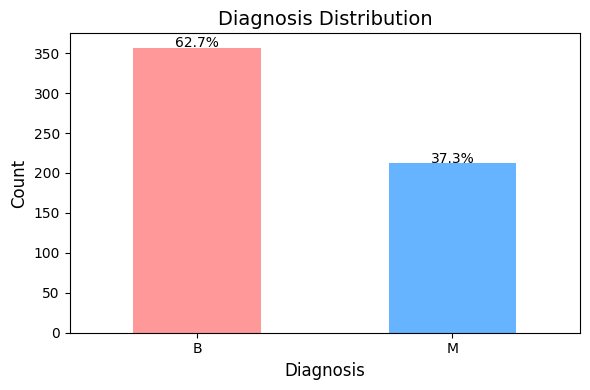

In [66]:
# Value counts and percentage
counts = df['diagnosis'].value_counts()
percentages = counts / counts.sum() * 100

# Plot
colors = ['#FF9999', '#66B3FF']
ax = counts.plot(kind='bar', color=colors, figsize=(6,4))

# Add percentage labels
for i, (count, pct) in enumerate(zip(counts, percentages)):
    ax.text(i, count + 1, f'{pct:.1f}%', ha='center', fontsize=10)

# Title and labels
plt.title('Diagnosis Distribution', fontsize=14)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [67]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [68]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [69]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

There are no missing values in the dataset. The data is clean and ready for analysis. The features are continuous variables and are not categorical. The target column is categorical and needs to be converted into numerical values for analysis.

## Preprocessing

In [70]:
encoder=LabelEncoder()
df['diagnosis']=encoder.fit_transform(df['diagnosis'])
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

#### 🩺 Diagnosis Classes

In this dataset:

- **0** → 🟩 **Benign** (non-cancerous)
- **1** → 🟥 **Malignant** (cancerous)

> ⚠️ Note: Understanding class labels is important for correct interpretation of model results.


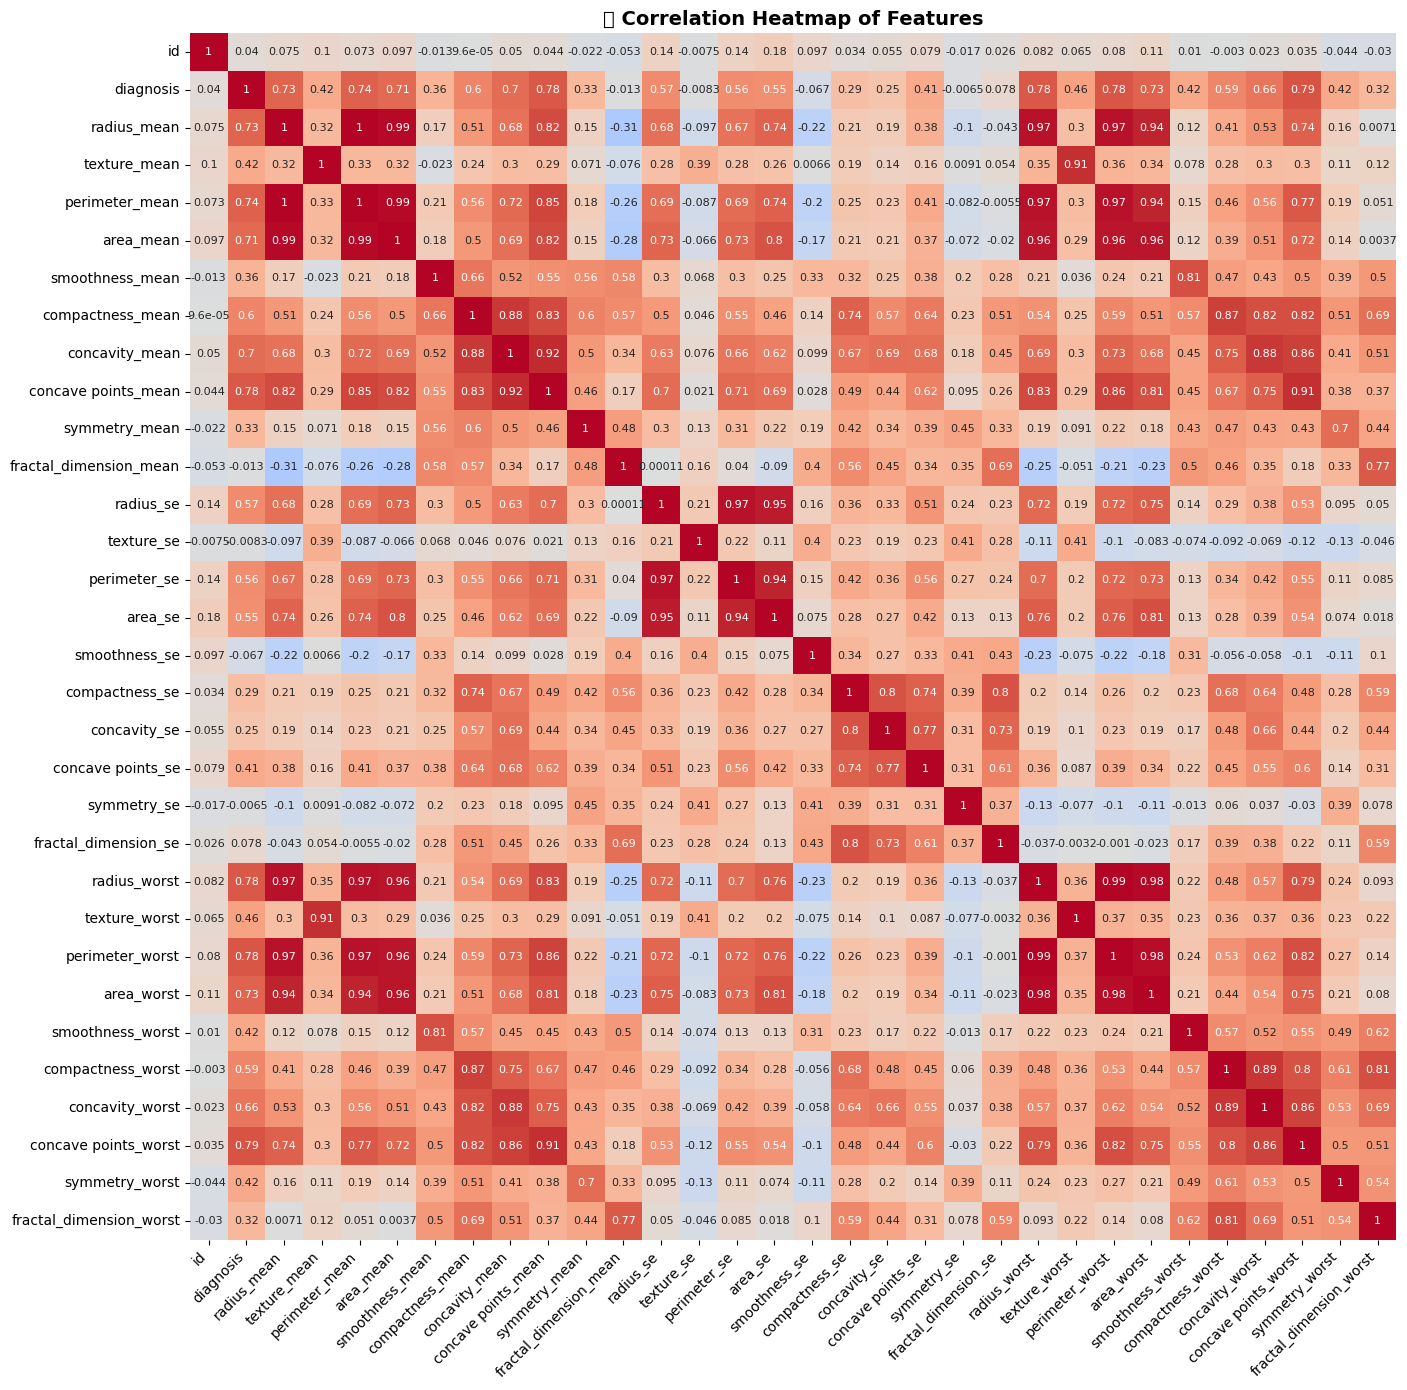

In [71]:
plt.figure(figsize=(16, 14))  # Slightly larger for 32 columns
sns.heatmap(
    df.corr(),
    annot=True,
    # fmt='.2f',
    cmap='coolwarm',
    center=0,
    cbar=False,                
    square=True,               
    annot_kws={"size": 8}      
)
plt.xticks(rotation=45, ha='right')  # Rotate x labels
plt.yticks(rotation=0)
plt.title('🔍 Correlation Heatmap of Features', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


### Select the Features that highly correlated with the target variable

In [72]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Get correlation of all features with the target 'diagnosis'
target_corr = corr_matrix['diagnosis'].drop('diagnosis')

# Select features where correlation is > 0.2 or < -0.2
important_features = target_corr[abs(target_corr) > 0.2].sort_values(ascending=False)

# Display selected features and their correlation values
print("🔍 Features with Correlation > 0.2 or < -0.2 with 'diagnosis':\n")
print(important_features)


🔍 Features with Correlation > 0.2 or < -0.2 with 'diagnosis':

concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
Name: diagnosis, dtype: float64


#### Selection of Features

In [73]:
X= df[important_features.index.tolist()]
y= df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building the Model

In [74]:
# Initialize an empty DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Function to run a model, evaluate it, and store the results
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict the labels on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Create a DataFrame with the results for this model
    model_results = pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1-Score': [f1]
    })
    
    # Use pd.concat() to append the results to the main DataFrame
    global results
    results = pd.concat([results, model_results], ignore_index=True)
    if results.duplicated().any():
     results.drop_duplicates(inplace=True)
    




### Logistic Regression

In [75]:
# Evaluate Logistic Regression
evaluate_model(LogisticRegression(), X_train, X_test, y_train, y_test, 'Logistic Regression')


In [76]:
results.sort_values(by='F1-Score', ascending=False).reset_index(drop=True).style \
    .background_gradient(cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)) \
    .set_caption("📊 Model Evaluation Results")



,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.964912,0.975610,0.930233,0.952381


### Random Forest Classifier

In [77]:
# Evaluate Random Forest Classifier
evaluate_model(RandomForestClassifier(), X_train, X_test, y_train, y_test, 'Random Forest Classifier')

In [78]:
results.sort_values(by='F1-Score', ascending=False).reset_index(drop=True).style \
    .background_gradient(cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)) \
    .set_caption("📊 Model Evaluation Results")

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.964912,0.975610,0.930233,0.952381
1,Random Forest Classifier,0.964912,0.975610,0.930233,0.952381


### Support Vector Classifier

In [79]:
evaluate_model(SVC(), X_train, X_test, y_train, y_test, 'SVC')
results.sort_values(by='F1-Score', ascending=False).reset_index(drop=True).style \
    .background_gradient(cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)) \
    .set_caption("📊 Model Evaluation Results")

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.964912,0.975610,0.930233,0.952381
1,Random Forest Classifier,0.964912,0.975610,0.930233,0.952381
2,SVC,0.947368,1.000000,0.860465,0.925000


### K-Nearest Neighbors Classifier

In [80]:
evaluate_model(KNeighborsClassifier(), X_train, X_test, y_train, y_test, 'KNN')
results.sort_values(by='F1-Score', ascending=False).reset_index(drop=True).style \
    .background_gradient(cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)) \
    .set_caption("📊 Model Evaluation Results")

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.964912,0.975610,0.930233,0.952381
1,Random Forest Classifier,0.964912,0.975610,0.930233,0.952381
2,KNN,0.956140,1.000000,0.883721,0.938272
3,SVC,0.947368,1.000000,0.860465,0.925000


### Decision Tree Classifier

In [81]:
evaluate_model(DecisionTreeClassifier(), X_train, X_test, y_train, y_test, 'Decision Tree')
results.sort_values(by='F1-Score', ascending=False).reset_index(drop=True).style \
    .background_gradient(cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)) \
    .set_caption("📊 Model Evaluation Results")

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.964912,0.975610,0.930233,0.952381
1,Random Forest Classifier,0.964912,0.975610,0.930233,0.952381
2,KNN,0.956140,1.000000,0.883721,0.938272
3,SVC,0.947368,1.000000,0.860465,0.925000
4,Decision Tree,0.929825,0.888889,0.930233,0.909091


#### XGBoost Classifier

In [82]:
evaluate_model(XGBClassifier(), X_train, X_test, y_train, y_test, 'XGBClassifier')
results.sort_values(by='F1-Score', ascending=False).reset_index(drop=True).style \
    .background_gradient(cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)) \
    .set_caption("📊 Model Evaluation Results")

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.964912,0.975610,0.930233,0.952381
1,Random Forest Classifier,0.964912,0.975610,0.930233,0.952381
2,XGBClassifier,0.956140,0.952381,0.930233,0.941176
3,KNN,0.956140,1.000000,0.883721,0.938272
4,SVC,0.947368,1.000000,0.860465,0.925000
5,Decision Tree,0.929825,0.888889,0.930233,0.909091


### Gaussian Naive Bayes Classifier

In [83]:
evaluate_model(GaussianNB(), X_train, X_test, y_train, y_test, 'Gaussian NB')
results.sort_values(by='F1-Score', ascending=False).reset_index(drop=True).style \
    .background_gradient(cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)) \
    .set_caption("📊 Model Evaluation Results")

,Model,Accuracy,Precision,Recall,F1-Score
0,Gaussian NB,0.973684,1.000000,0.930233,0.963855
1,Logistic Regression,0.964912,0.975610,0.930233,0.952381
2,Random Forest Classifier,0.964912,0.975610,0.930233,0.952381
3,XGBClassifier,0.956140,0.952381,0.930233,0.941176
4,KNN,0.956140,1.000000,0.883721,0.938272
5,SVC,0.947368,1.000000,0.860465,0.925000
6,Decision Tree,0.929825,0.888889,0.930233,0.909091


### Gradient Boosting Classifier

In [84]:
evaluate_model(GradientBoostingClassifier(), X_train, X_test, y_train, y_test, 'Gradient Boosting Classifier')
results.sort_values(by='F1-Score', ascending=False).reset_index(drop=True).style \
    .background_gradient(cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)) \
    .set_caption("📊 Model Evaluation Results")

,Model,Accuracy,Precision,Recall,F1-Score
0,Gaussian NB,0.973684,1.000000,0.930233,0.963855
1,Logistic Regression,0.964912,0.975610,0.930233,0.952381
2,Random Forest Classifier,0.964912,0.975610,0.930233,0.952381
3,Gradient Boosting Classifier,0.964912,0.975610,0.930233,0.952381
4,XGBClassifier,0.956140,0.952381,0.930233,0.941176
5,KNN,0.956140,1.000000,0.883721,0.938272
6,SVC,0.947368,1.000000,0.860465,0.925000
7,Decision Tree,0.929825,0.888889,0.930233,0.909091


### MLP Classifier

In [59]:
evaluate_model(MLPClassifier(), X_train, X_test, y_train, y_test, 'MLP Classifier')
results.sort_values(by='F1-Score', ascending=False).reset_index(drop=True).style \
    .background_gradient(cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)) \
    .set_caption("📊 Model Evaluation Results")

,Model,Accuracy,Precision,Recall,F1-Score
0,Gaussian NB,0.973684,1.000000,0.930233,0.963855
1,Logistic Regression,0.964912,0.975610,0.930233,0.952381
2,Gradient Boosting Classifier,0.964912,0.975610,0.930233,0.952381
3,Random Forest Classifier,0.956140,0.952381,0.930233,0.941176
4,XGBClassifier,0.956140,0.952381,0.930233,0.941176
5,MLP Classifier,0.956140,0.975000,0.906977,0.939759
6,KNN,0.956140,1.000000,0.883721,0.938272
7,SVC,0.947368,1.000000,0.860465,0.925000
8,MLP Classifier,0.938596,1.000000,0.837209,0.911392
9,Decision Tree,0.929825,0.888889,0.930233,0.909091


## Model Evaluation

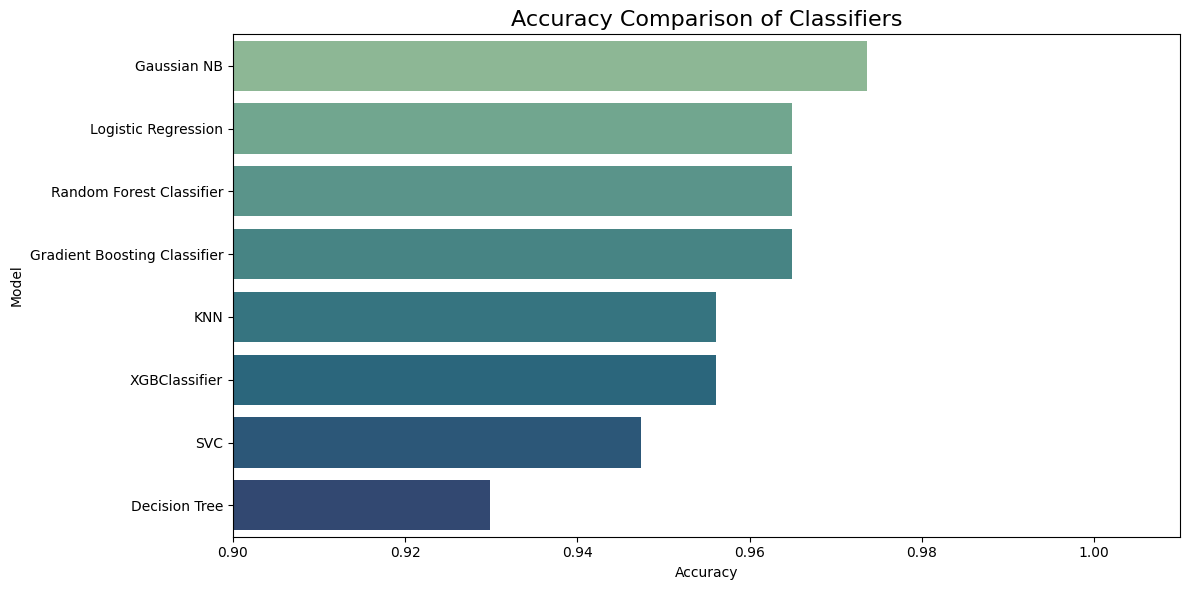

In [93]:
# Sort results by Accuracy for better visualization
results_sorted = results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
plt.figure(figsize=(12, 6))
sns.barplot(x='Accuracy', y='Model', data=results_sorted, palette='crest')
plt.title('Accuracy Comparison of Classifiers', fontsize=16)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0.90, 1.01)  # adjust as needed
plt.tight_layout()
plt.show()

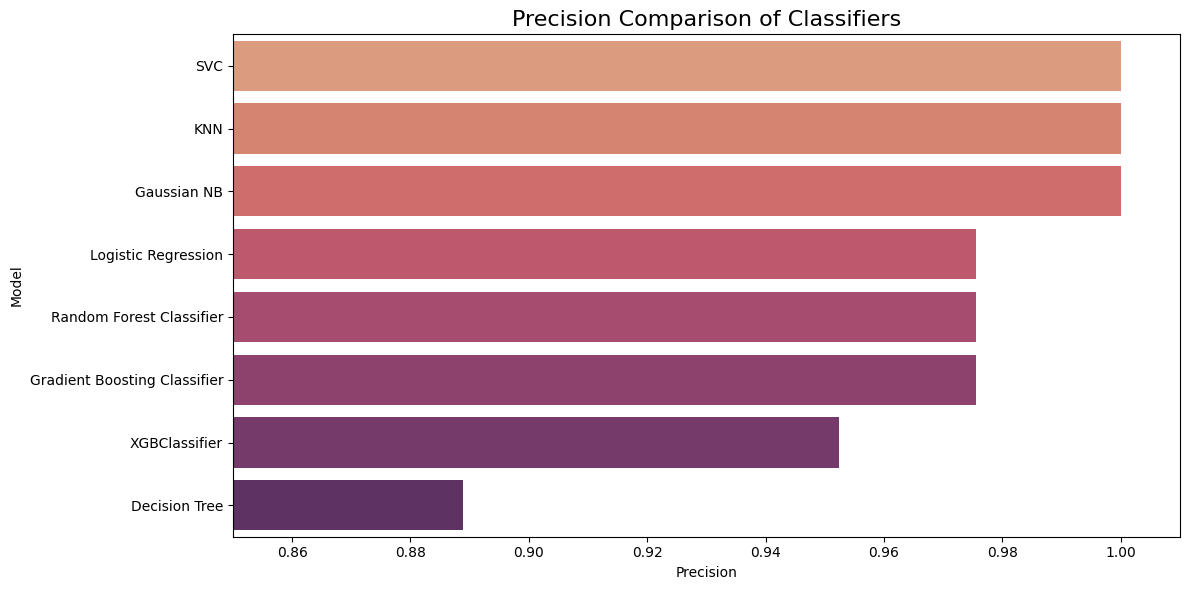

In [92]:
# Sort results by Precision for better visualization
results_sorted = results.sort_values(by='Precision', ascending=False).reset_index(drop=True)

# Set figure size
plt.figure(figsize=(12, 6))

# Plot Precision scores
sns.barplot(x='Precision', y='Model', data=results_sorted, palette='flare')

# Titles and labels
plt.title('Precision Comparison of Classifiers', fontsize=16)
plt.xlabel('Precision')
plt.ylabel('Model')
plt.xlim(0.85, 1.01)  # Adjust if needed

# Display the plot
plt.tight_layout()
plt.show()


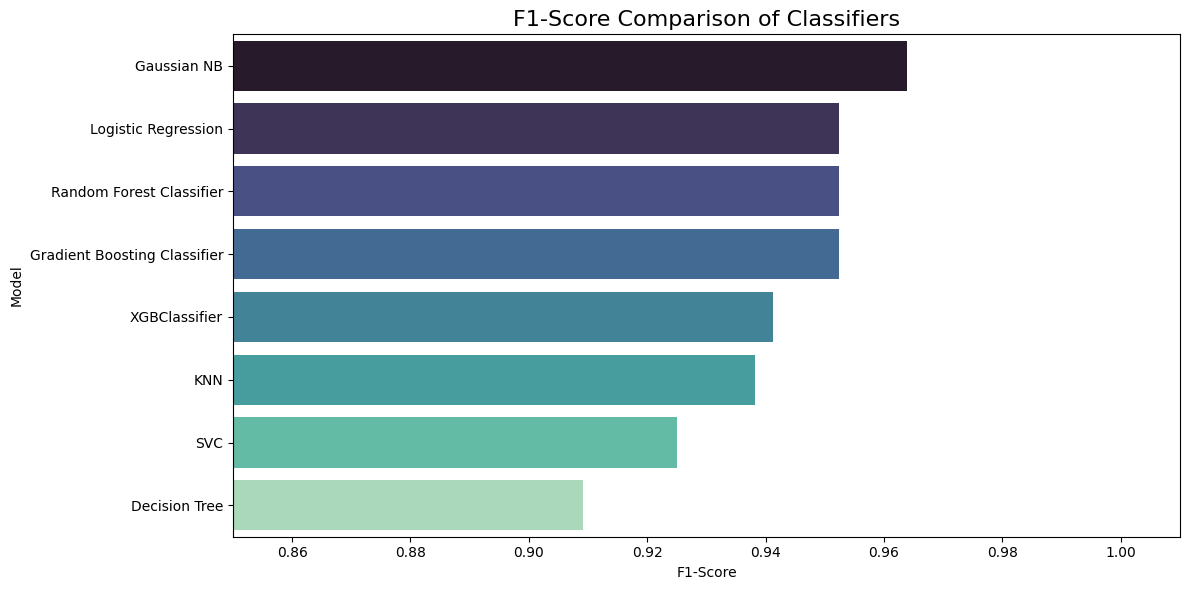

In [91]:
# Sort results by F1-Score for better visualization
results_sorted = results.sort_values(by='F1-Score', ascending=False).reset_index(drop=True)

# Set figure size
plt.figure(figsize=(12, 6))

# Plot F1-Score
sns.barplot(x='F1-Score', y='Model', data=results_sorted, palette='mako')

# Titles and labels
plt.title('F1-Score Comparison of Classifiers', fontsize=16)
plt.xlabel('F1-Score')
plt.ylabel('Model')
plt.xlim(0.85, 1.01)  # Adjust based on your data

# Show the plot
plt.tight_layout()
plt.show()


## Conclusion
After evaluating multiple classification models on key metrics such as Accuracy, Precision, Recall, and F1-Score, we observe the following:

- Gaussian Naive Bayes emerges as the top-performing model across the board, achieving the highest Accuracy (0.974) and F1-Score (0.964). Its perfect Precision (1.000) ensures that it correctly identifies all positive instances, making it highly reliable and well-suited for tasks where both precision and recall are crucial.

- Logistic Regression and Gradient Boosting Classifier show excellent performance as well, with F1-Scores of 0.952 and Accuracy values of 0.965, offering a good balance between precision and recall.

- Random Forest, XGBoost, and MLP Classifier all demonstrate solid overall performance with Accuracies around 0.956 and slightly lower F1-Scores, indicating they are good options when a robust classifier is needed, but with a small trade-off in precision or recall.

- KNN and Support Vector Classifier (SVC), while exhibiting high precision, fall slightly behind in F1-Score due to reduced recall, suggesting they may be better suited for cases where precision is more critical than recall.

- Decision Tree classifiers rank lowest in overall performance, particularly in Accuracy and F1-Score, suggesting that they may not be ideal for this classification task.

After evaluating multiple classification models on key metrics such as Accuracy, Precision, Recall, and F1-Score, we observe the following:

Gaussian Naive Bayes emerges as the top-performing model across the board, achieving the highest Accuracy (0.974) and F1-Score (0.964). Its perfect Precision (1.000) ensures that it correctly identifies all positive instances, making it highly reliable and well-suited for tasks where both precision and recall are crucial.

Logistic Regression and Gradient Boosting Classifier show excellent performance as well, with F1-Scores of 0.952 and Accuracy values of 0.965, offering a good balance between precision and recall.

Random Forest, XGBoost, and MLP Classifier all demonstrate solid overall performance with Accuracies around 0.956 and slightly lower F1-Scores, indicating they are good options when a robust classifier is needed, but with a small trade-off in precision or recall.

KNN and Support Vector Classifier (SVC), while exhibiting high precision, fall slightly behind in F1-Score due to reduced recall, suggesting they may be better suited for cases where precision is more critical than recall.

Decision Tree classifiers rank lowest in overall performance, particularly in Accuracy and F1-Score, suggesting that they may not be ideal for this classification task.

**Final Recommendation:** For this task, Gaussian Naive Bayes provides the best overall performance due to its superior Accuracy, F1-Score, and Precision. However, Logistic Regression and Gradient Boosting offer strong alternatives for achieving a balanced model with reliable results. For this task, Gaussian Naive Bayes provides the best overall performance due to its superior Accuracy, F1-Score, and Precision. However, Logistic Regression and Gradient Boosting offer strong alternatives for achieving a balanced model with reliable results.